In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore as zscore


In [3]:
main_df=pd.read_excel('ML Case training data.xlsx')
hist_df=pd.read_excel('ML Case training Historical Data.xlsx')
churn_df=pd.read_excel('ML Case training output.xlsx')
main_df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
hist_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
churn_df.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
dt_lst=['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']

In [7]:
main_df=pd.read_excel('ML Case training data.xlsx',parse_dates=dt_lst)

In [8]:
main_df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [9]:
hist_df=pd.read_excel('ML Case training Historical Data.xlsx',parse_dates=['price_date'])

In [10]:
hist_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [11]:
#rename churn_df
churn_df['churn']=churn_df['churn'].replace({0:'Not Churn',1:'Churn'})
churn_df.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,Not Churn
1,24011ae4ebbe3035111d65fa7c15bc57,Churn
2,d29c2c54acc38ff3c0614d0a653813dd,Not Churn
3,764c75f661154dac3a6c254cd082ea7d,Not Churn
4,bba03439a292a1e166f80264c16191cb,Not Churn


In [12]:
churn_df['churn'].value_counts()

Not Churn    14501
Churn         1595
Name: churn, dtype: int64

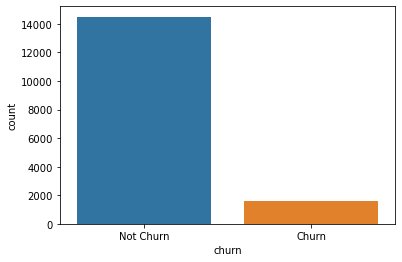

In [13]:
sns.countplot(x=churn_df['churn'],data=churn_df);

In [14]:
rate_of_churn=((churn_df['churn'].value_counts())/len(churn_df))*100
rate_of_churn

Not Churn    90.090706
Churn         9.909294
Name: churn, dtype: float64

**Facts: 
1.In the last 3 months, 1595 customers have churned; which is close to 10% of total customers
2.There are 14501 active clients right now; which is around 90%


In [15]:
#exploring the historical_data set
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [16]:
hist_df.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [17]:
missing_val_percentage=hist_df.isnull().mean()*100
missing_val_percentage

id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

In [18]:
hist_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


* Insights:
**The prices of energy and power decreased over the phases in the last year.
**The minimum of energy is 0 which indicates consumer churn
**There are negative values in price_p1_fix,price_p2_fix and price_p3_fix; thus, the data is probably corrupted.
** 6 of the features contain NaN values



In [19]:
# Exploring main_df
main_df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [21]:
main_df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


**Average tenure of the client: 5 years
**

## Handling missing data

**The History Dataset

In [22]:
neg_cols=['price_p1_fix','price_p2_fix','price_p3_fix']
hist_df[neg_cols]=hist_df[neg_cols].apply(abs)

In [23]:
hist_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


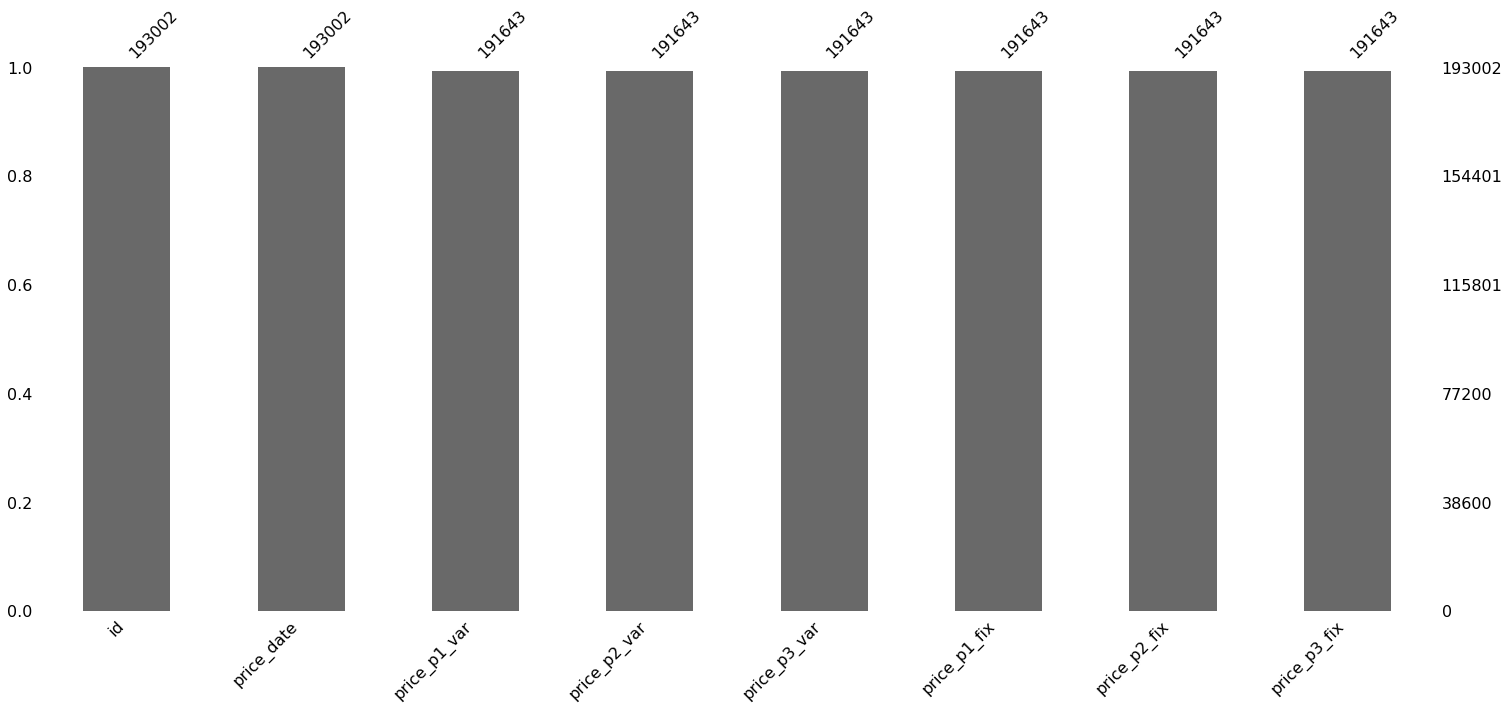

In [24]:
msno.bar(hist_df);

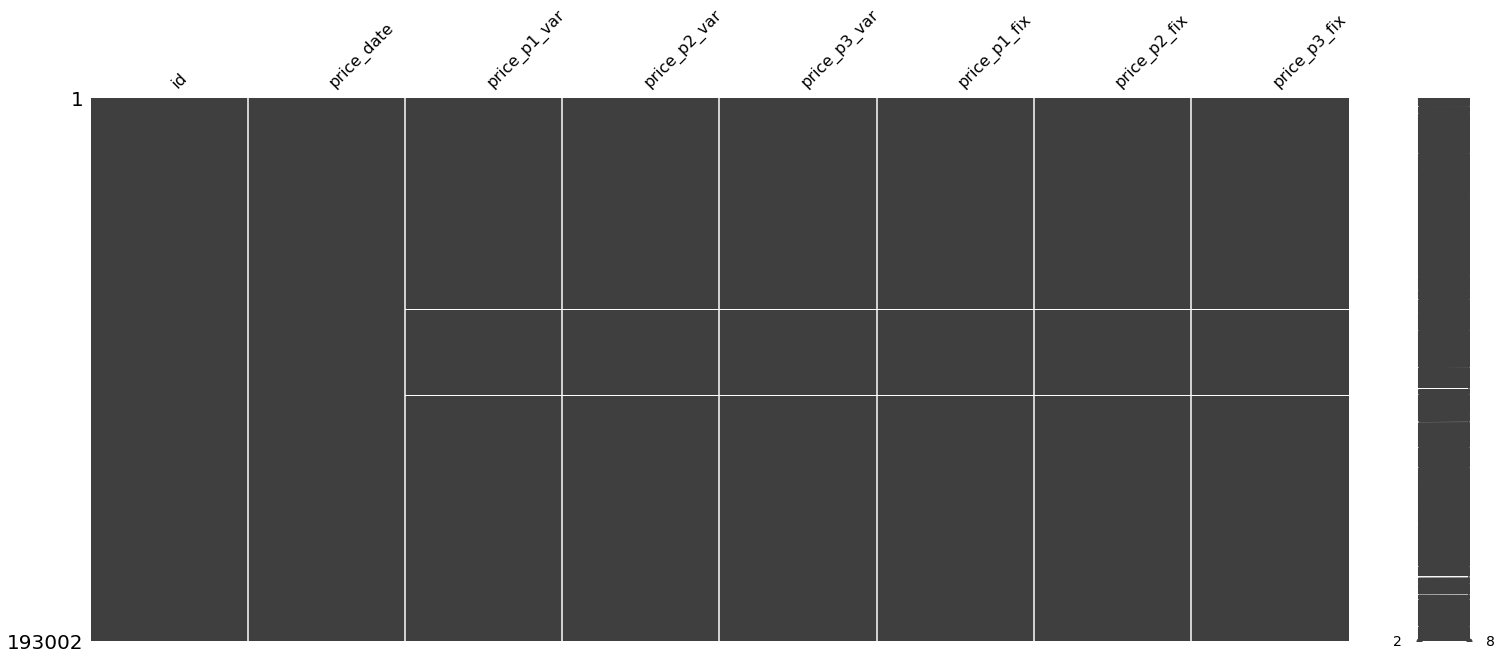

In [25]:
sorted_df=hist_df.sort_values(by=['id','price_date'])
msno.matrix(sorted_df);


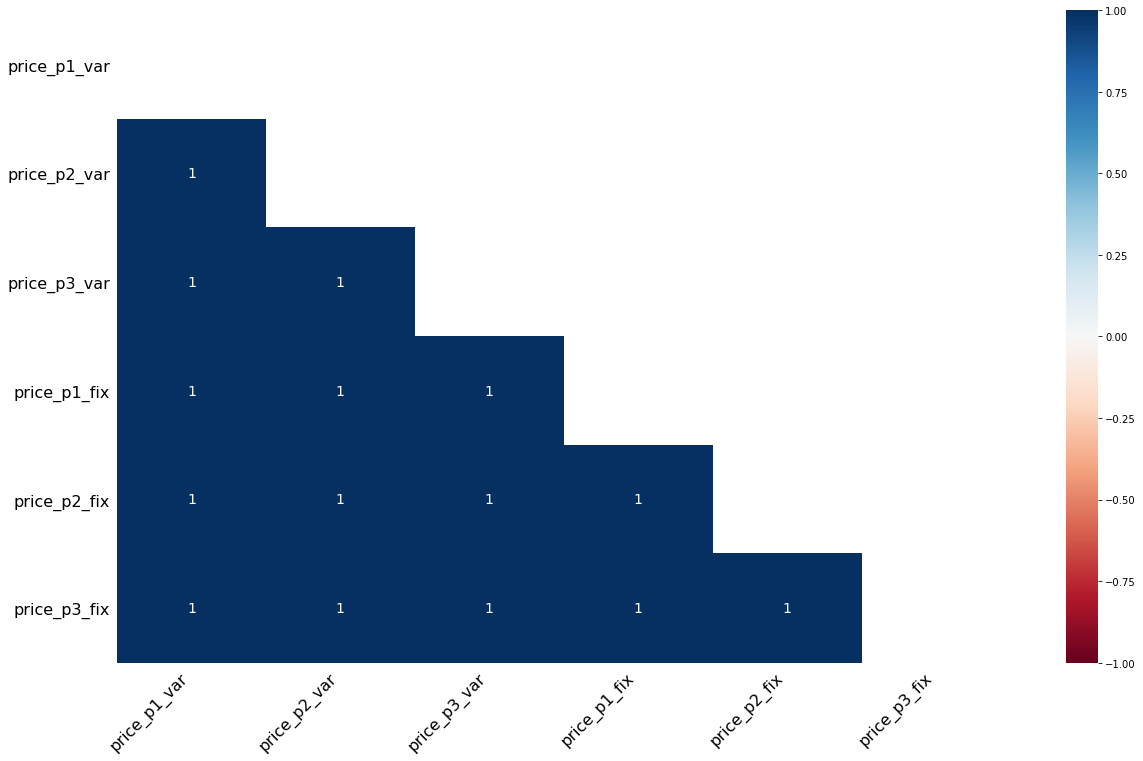

In [26]:
msno.heatmap(hist_df);

In [29]:
#Index of the IDs containing missing values
hist_NAN_index=hist_df[hist_df.isnull().any(axis=1)].index.values.tolist()
#dataframe with the missing values
hist_missing=hist_df.iloc[hist_NAN_index,:]
hist_missing.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#extract unique dates
dates=hist_missing['price_date'].unique()
ids=hist_missing['id'].unique()

In [31]:
time_df=pd.DataFrame(data=dates,columns=['price_date'])
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


## There is high correlation between the missingness in the numeric columns and is values,missing or non-missing
**Thus, some columns are likely to be MNAR(Missing not at random).So, there might be multicolinearlity in the dataset.


In [32]:
#IMPUTING TIME SERIES DATA
hist_copy=hist_df.copy(deep=True)
hist_copy.fillna(method='ffill',inplace=True)
print(hist_copy.iloc[hist_NAN_index,3:9].head())


     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75       0.000000      0.000000     44.266931      0.000000      0.000000
221      0.000000      0.000000     44.266931      0.000000      0.000000
377      0.087970      0.000000     44.266931      0.000000      0.000000
413      0.102239      0.070381     40.565969     24.339581     16.226389
461      0.000000      0.000000     44.266931      0.000000      0.000000


In [33]:
hist_copy.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [34]:
#merge churn dataset with hist_copy
hist_merged=hist_copy.merge(right=churn_df,on='id')

In [35]:
hist_merged.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Not Churn
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Not Churn
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Not Churn
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Not Churn
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Not Churn


# Visualizing Main Dataset

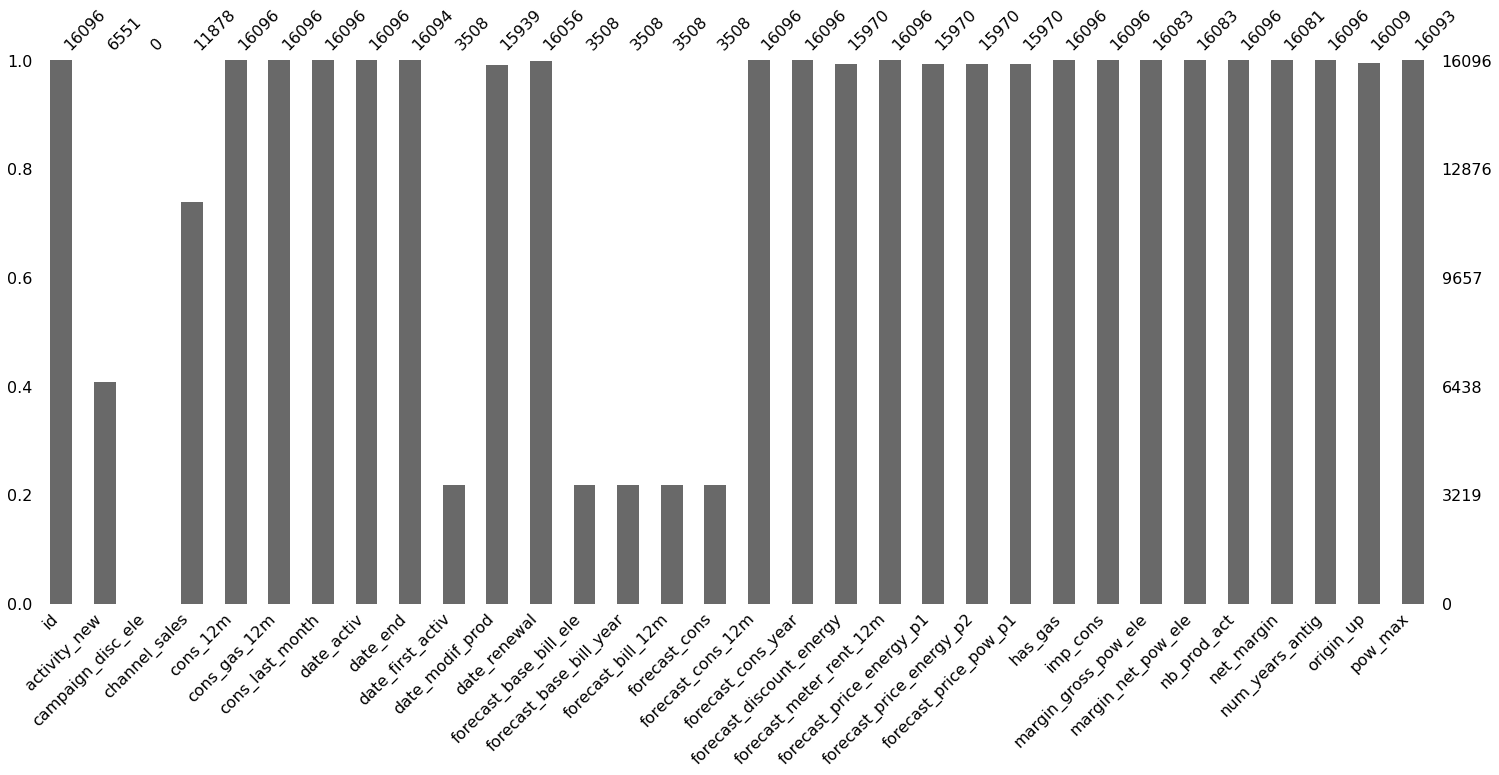

In [38]:
msno.bar(main_df);

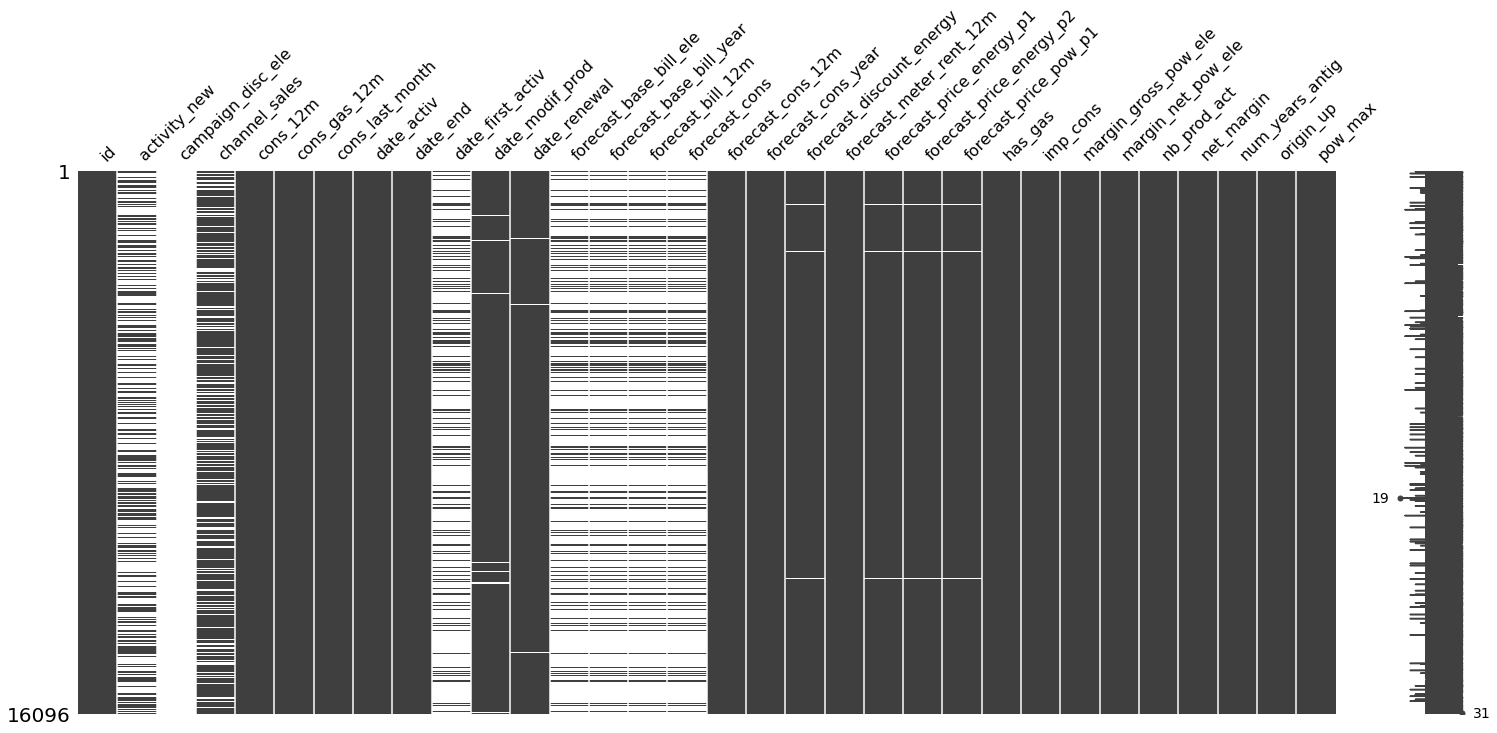

In [39]:
msno.matrix(main_df);

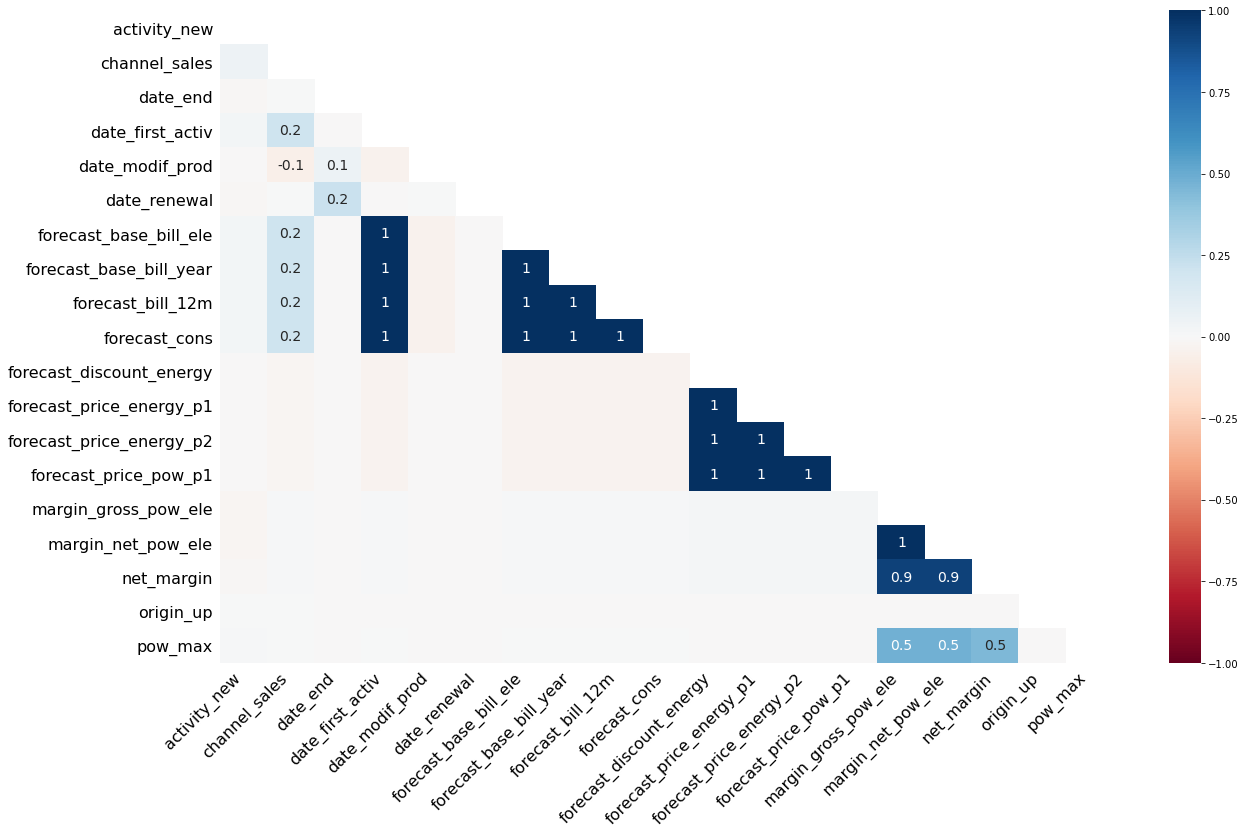

In [41]:
msno.heatmap(main_df);

In [ ]:
1.the column 'activity_new' is MCAR and thus can be dropped.
2.the column 'campaign_disc_ele' is MCAR on all rows.Thus,this column can be dropped.



In [42]:
#dropping columns
main_df_drop=main_df.drop(['activity_new','campaign_disc_ele'],axis=1)




In [44]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [48]:
#choose the columns without missing values
incomplete_cols=['channel_sales','pow_max','origin_up','net_margin','margin_net_pow_ele','margin_gross_pow_ele','forecast_price_pow_p1','forecast_price_energy_p2','forecast_price_energy_p1','forecast_discount_energy','forecast_cons','forecast_bill_12m','forecast_base_bill_year','forecast_base_bill_ele','date_renewal','date_modif_prod','date_first_activ','date_end']
main_df_new=main_df_drop.drop(columns=['channel_sales','pow_max','origin_up','net_margin','margin_net_pow_ele','margin_gross_pow_ele','forecast_price_pow_p1','forecast_price_energy_p2','forecast_price_energy_p1','forecast_discount_energy','forecast_cons','forecast_bill_12m','forecast_base_bill_year','forecast_base_bill_ele','date_renewal','date_modif_prod','date_first_activ','date_end'],axis=1)


In [49]:
main_df_new.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,nb_prod_act,num_years_antig
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,26520.30,10025,359.29,f,831.8,1,3
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,0.00,0,1.78,t,0.0,2,3
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,189.95,0,16.27,f,0.0,1,6
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,47.96,0,38.72,f,0.0,1,6
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,240.04,0,19.83,f,0.0,1,6


In [50]:
main_df_new.isnull().sum()

id                         0
cons_12m                   0
cons_gas_12m               0
cons_last_month            0
date_activ                 0
forecast_cons_12m          0
forecast_cons_year         0
forecast_meter_rent_12m    0
has_gas                    0
imp_cons                   0
nb_prod_act                0
num_years_antig            0
dtype: int64

In [51]:
main_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       16096 non-null  object        
 1   cons_12m                 16096 non-null  int64         
 2   cons_gas_12m             16096 non-null  int64         
 3   cons_last_month          16096 non-null  int64         
 4   date_activ               16096 non-null  datetime64[ns]
 5   forecast_cons_12m        16096 non-null  float64       
 6   forecast_cons_year       16096 non-null  int64         
 7   forecast_meter_rent_12m  16096 non-null  float64       
 8   has_gas                  16096 non-null  object        
 9   imp_cons                 16096 non-null  float64       
 10  nb_prod_act              16096 non-null  int64         
 11  num_years_antig          16096 non-null  int64         
dtypes: datetime64[ns](1), float64(3)

In [53]:
#manage the negative values
numeric=[cols for cols in main_df_new.columns if main_df_new[cols].dtype=='float64' or main_df_new[cols].dtype=='int64']
main_df_new[numeric]=main_df_new[numeric].apply(abs)

In [54]:
main_df_new.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,nb_prod_act,num_years_antig
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,26520.30,10025,359.29,f,831.8,1,3
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,0.00,0,1.78,t,0.0,2,3
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,189.95,0,16.27,f,0.0,1,6
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,47.96,0,38.72,f,0.0,1,6
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,240.04,0,19.83,f,0.0,1,6


In [56]:
#converting the 'has_gas' col to Yes/No
main_df_new['has_gas']=main_df_new['has_gas'].replace({'t':'Yes','f':'No'})

In [58]:
main_df_merged=main_df_new.merge(right=churn_df,on='id')
main_df_merged.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,nb_prod_act,num_years_antig,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,26520.30,10025,359.29,No,831.8,1,3,Not Churn
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,0.00,0,1.78,Yes,0.0,2,3,Churn
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,189.95,0,16.27,No,0.0,1,6,Not Churn
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,47.96,0,38.72,No,0.0,1,6,Not Churn
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,240.04,0,19.83,No,0.0,1,6,Not Churn


In [59]:
#calculate Z scores
tenure=zscore(a=main_df_merged['num_years_antig'])
abs_tenure=np.abs(tenure)
churn_tenure=main_df_merged[['churn','num_years_antig']]
churn_tenure['z_score']=list(abs_tenure)
#remove outliers
churn_tenure_filtered=churn_tenure[churn_tenure['z_score']<3]

<ipython-input-59-80045facf674>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_tenure['z_score']=list(abs_tenure)


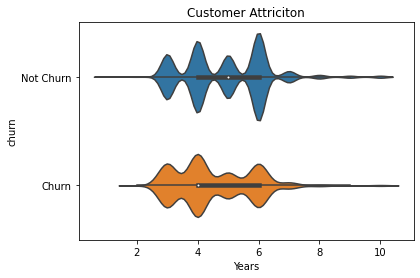

In [61]:
#Visualize
violin_plot=sns.violinplot(y=churn_tenure_filtered['churn'],x=churn_tenure_filtered['num_years_antig']);
violin_plot.set(xlabel='Years')
violin_plot.set_title('Customer Attriciton')
plt.show()

# Insights:
1.Median age of churners=4.
2.Customers are more likely to churn in the 4th year than the 7th year.
3.Median age of retained customers is 5.